## New York City Airbnb Open Data
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

What can we learn about different hosts and areas?
What can we learn from predictions? (ex: locations, prices, reviews, etc)
Which hosts are the busiest and why?
Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [69]:
#import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set_style('darkgrid')

In [70]:
#load data
data = pd.read_csv('AB_NYC_2019.csv')

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

We are seeing 48895 data points with 16 features.
We have numerical, catogorical and text features (reviews)

In [72]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Features last_review and reviews_per_month are having NaN values.
In availability_365 we see 0 value, which is absurd
Some stays are not having any reviews number_of_reviews is 0

What does it mean by availbility_365 value 0?


## Check for Missing values

<AxesSubplot:>

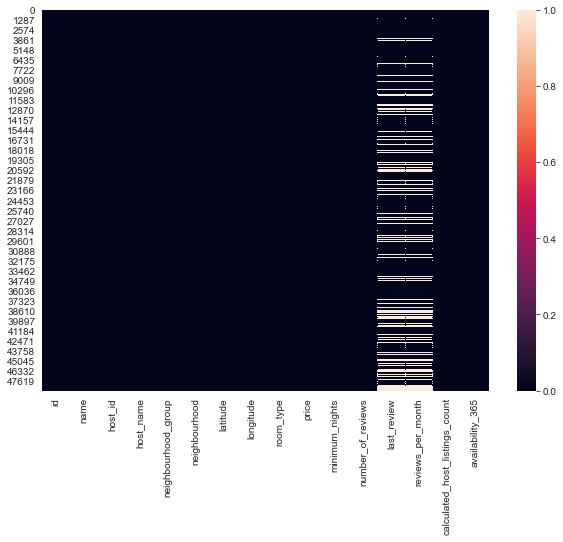

In [91]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isna())

We are observing last_review is having missing values and corresponding reviews_per_month is also 0.
last_review contains strings, not time related objects
room without a last review has no reviews at all (number_of_reviews=0)
so we simply filled up everything with the string 'never', which is actually the truth.

/Users/santoshlalitha/Documents/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='last_review', ylabel='count'>

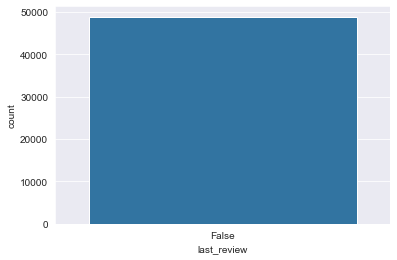

In [98]:
import math
sns.countplot(data['last_review'].isna())

In [96]:
data['last_review'].fillna('never', inplace=True)
data['reviews_per_month'].fillna(0, inplace=True)

In [97]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,never,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Check the distribution of data and Outliers

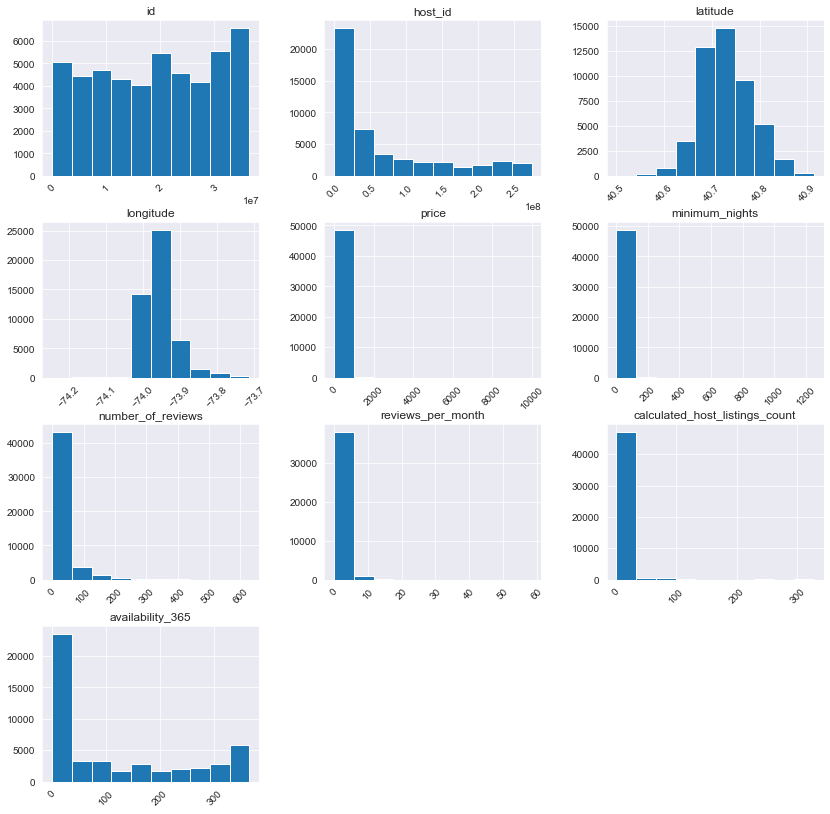

In [73]:
data.hist(figsize=(14,14),xrot=45)
plt.show()

Here minimum_nights,Price,calculated_host_listing_count are having outliers
We observe availability_365 value 0 is having more data points.

In [74]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Possible outliers:
Price min is 0 and Max is 10K
minimum_nights max value is 1250

In [75]:
data.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


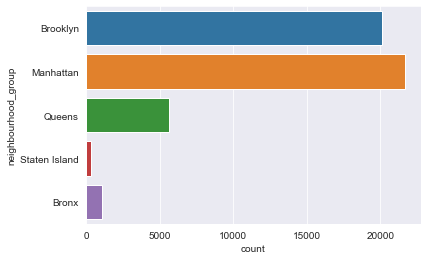

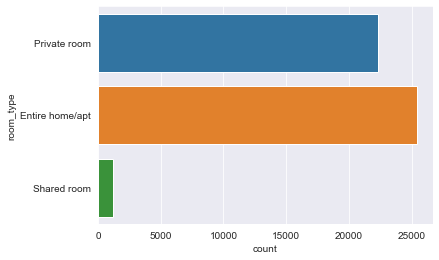

In [76]:
for column in data.select_dtypes('object'):
    if data[column].nunique() < 10:
        sns.countplot(y=column,data=data)
        plt.show()

We are observing Manhattan and Brroklyn, hosts are more.
Hosts are not opting for Shared room 

### Working with Outliers

In [77]:
#Check percentile of Price
i = 0
while i<=100:
    print(i,"th percentile ",np.percentile(data['price'], i))
    i +=10

0 th percentile  0.0
10 th percentile  49.0
20 th percentile  60.0
30 th percentile  75.0
40 th percentile  90.0
50 th percentile  106.0
60 th percentile  130.0
70 th percentile  155.0
80 th percentile  200.0
90 th percentile  269.0
100 th percentile  10000.0


We observe Price is more after 90th percentile

In [78]:
#Check percentile of Price
i = 90
while i<=100:
    print(i,"th percentile ",np.percentile(data['price'], i))
    i +=1

90 th percentile  269.0
91 th percentile  285.0
92 th percentile  300.0
93 th percentile  300.0
94 th percentile  340.0
95 th percentile  355.0
96 th percentile  400.0
97 th percentile  450.0
98 th percentile  550.0
99 th percentile  799.0
100 th percentile  10000.0


In [79]:
#Check percentile of Price
i = 99
while i<=100:
    print(round(i,2),"th percentile ",np.percentile(data['price'], i))
    i +=0.1

99 th percentile  799.0
99.1 th percentile  800.0
99.2 th percentile  850.0
99.3 th percentile  950.0
99.4 th percentile  1000.0
99.5 th percentile  1000.0
99.6 th percentile  1200.0
99.7 th percentile  1500.0
99.8 th percentile  2000.0
99.9 th percentile  3000.0
100.0 th percentile  10000.0


In [80]:
data['neighbourhood_group'][data['price']>1000].value_counts()

Manhattan        172
Brooklyn          54
Queens            10
Staten Island      2
Bronx              1
Name: neighbourhood_group, dtype: int64

In [81]:
#Drop the data which has price < 1000
data_clipped =  data[data['price'] <= 1000]

In [82]:
(len(data)-len(data_clipped))/len(data)*100

0.4888025360466305

We are dropping 0.05% data which has high price.

<Figure size 1080x720 with 0 Axes>

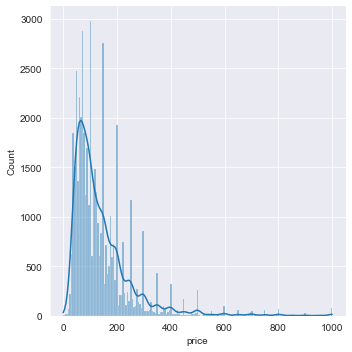

In [83]:
#plot 
plt.figure(figsize=(15, 10))
sns.displot(data_clipped['price'],kde=True)
plt.show()

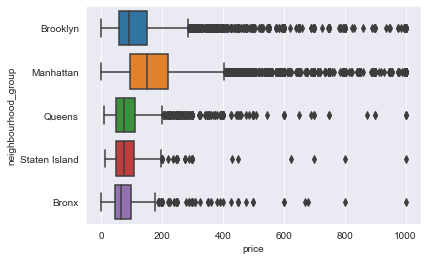

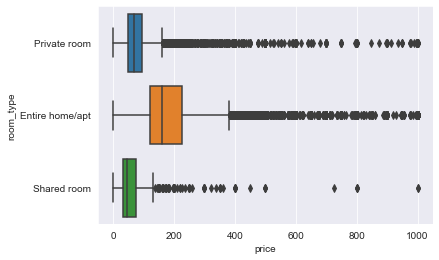

In [84]:
#Observe how price is varying wrt Neighbourhood_group
for column in data.select_dtypes('object'):
    if data_clipped[column].nunique() < 10:
        sns.boxplot(y=column,x='price',data=data_clipped)
        plt.show()

In [85]:
 #Check percentile of Min nights
i = 99
while i<=100:
    print(round(i,2),"th percentile ",np.percentile(data_clipped['minimum_nights'], i))
    i +=0.1

99 th percentile  40.0
99.1 th percentile  50.0
99.2 th percentile  60.0
99.3 th percentile  60.0
99.4 th percentile  80.0
99.5 th percentile  90.0
99.6 th percentile  90.0
99.7 th percentile  120.0
99.8 th percentile  180.0
99.9 th percentile  300.0
100.0 th percentile  1249.999999992724


In [86]:
len(data_clipped[data_clipped['minimum_nights'] > 120])

133

In [87]:
data_clipped =  data_clipped[data_clipped['minimum_nights'] <= 120]

In [88]:
data_clipped.shape

(48523, 16)

## EDA

What can we learn about different hosts and areas?
Which area has more hosts?
Price breakup based on area and room_type  
Which area has occupancy in particular room_type
Are prices impacted by No.of Reviews
Which hosts are the busiest and why? groupby host and no.of review per month
Is there any noticeable difference of traffic among different areas and what could be the reason for it?


<AxesSubplot:xlabel='count', ylabel='neighbourhood_group'>

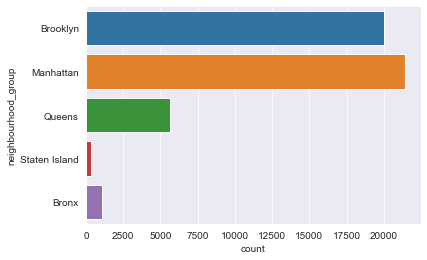

In [101]:
sns.countplot(y=data_clipped['neighbourhood_group'],data=data_clipped)

Which area has more hosts?
Manhattan and Brooklyn 

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

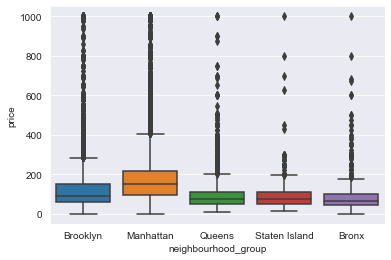

In [117]:
sns.boxplot(x='neighbourhood_group',y='price',data=data_clipped)

In [ ]:
Manhattan and Brooklyn 

<AxesSubplot:xlabel='room_type', ylabel='price'>

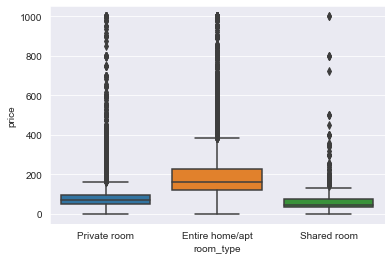

In [116]:
#Price breakup based on area and room_type
sns.boxplot(x='room_type',y='price',data=data_clipped)

We can observe entire home is more costlier than other two

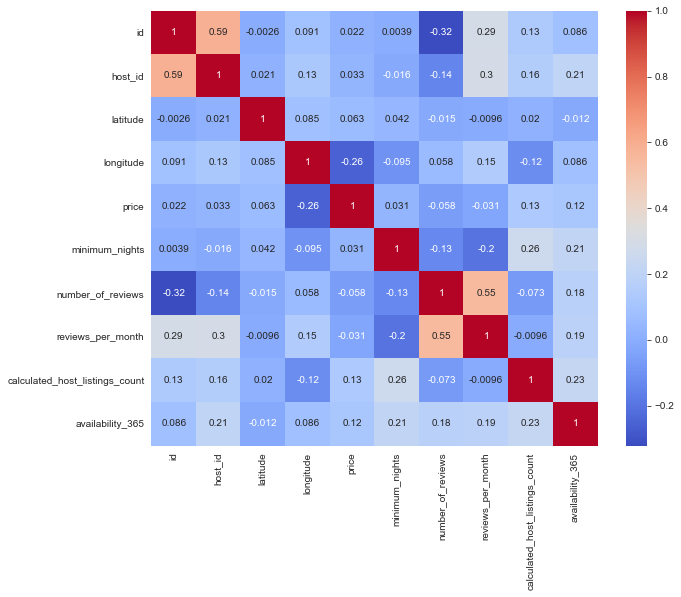

In [118]:
plt.figure(figsize=(10,8))
sns.heatmap(data_clipped.corr(), cmap='coolwarm', annot=True)
plt.show()

<AxesSubplot:xlabel='price', ylabel='number_of_reviews'>

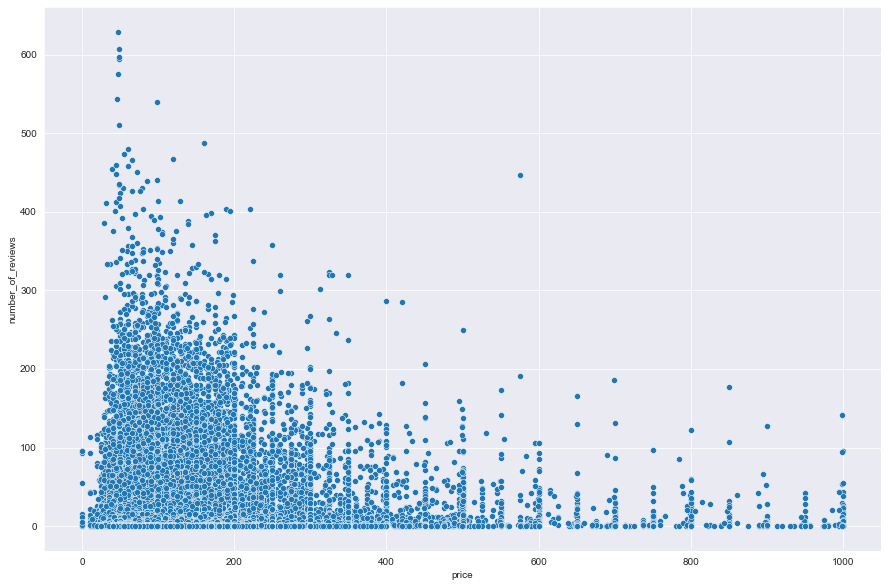

In [120]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='price',y='number_of_reviews',data=data_clipped)


In [126]:
#Which hosts are the busiest and why? groupby host and no.of review per month
data_clipped.groupby('host_id').mean()['reviews_per_month'].sort_values(ascending=False).head()

host_id
228415932    20.940000
244361589    18.620000
156684502    18.126667
217379941    15.780000
47621202     13.990000
Name: reviews_per_month, dtype: float64

<AxesSubplot:xlabel='reviews_per_month', ylabel='Density'>

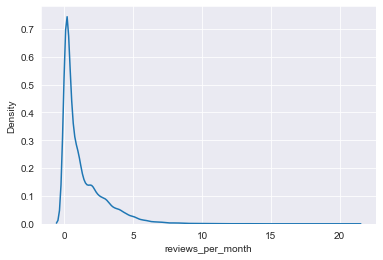

In [127]:
#Which hosts are the busiest and why? groupby host and no.of review per month
sns.kdeplot(data_clipped.groupby('host_id').mean()['reviews_per_month'].sort_values(ascending=False))